<center>
    <h1>Global Terrorism EDA</h1>
</center>

**Objective:** As a security/defense analyst, try to  find out the hot zone of terrorism.lin

**Done by:** Anurag Sunil

[Github Link](https://github.com/AnuragSunil)
[Linkedin Link](https://www.linkedin.com/in/anuragsunil/)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Setting a style
sns.set(style="whitegrid")

# Use a more serious color palette
serious_palette = sns.color_palette("dark")

In [3]:

data = pd.read_csv('GlobalTerrorismDataset.csv', encoding='iso-8859-1')
data.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

In [4]:
print(list(data.columns))

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

Renaming and choosing the columns I am gonna need (and feel are essential) for this visualization

In [5]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                     'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                     'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                     'weaptype1_txt':'Weapon_type'}, inplace=True)


In [6]:
data = data[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
             'Wounded','Target','Summary','Group','Target_type','Weapon_type']]


In [7]:
data.head()

Year  Month  Day             Country    state                       Region  \
0  1970      7    2  Dominican Republic      NaN  Central America & Caribbean   
1  1970      0    0              Mexico  Federal                North America   
2  1970      1    0         Philippines   Tarlac               Southeast Asia   
3  1970      1    0              Greece   Attica               Western Europe   
4  1970      1    0               Japan  Fukouka                    East Asia   

            city   latitude   longitude                      AttackType  \
0  Santo Domingo  18.456792  -69.951164                   Assassination   
1    Mexico city  19.371887  -99.086624     Hostage Taking (Kidnapping)   
2        Unknown  15.478598  120.599741                   Assassination   
3         Athens  37.997490   23.762728               Bombing/Explosion   
4        Fukouka  33.580412  130.396361  Facility/Infrastructure Attack   

   Killed  Wounded                   Target Summary  \
0     1.0      0.0             Julio Guzman     NaN   
1     0.0      0.0  Nadine Chaval, daughter     NaN   
2     1.0      0.0                 Employee     NaN   
3     NaN      NaN             U.S. Embassy     NaN   
4     NaN      NaN           U.S. Consulate     NaN   

                                Group                  Target_type Weapon_type  
0                              MANO-D  Private Citizens & Property     Unknown  
1  23rd of September Communist League      Government (Diplomatic)     Unknown  
2                             Unknown          Journalists & Media     Unknown  
3                             Unknown      Government (Diplomatic)  Explosives  
4                             Unknown      Government (Diplomatic)  Incendiary

<h3>Columns of the dataset</h3>


- **Year**: The year in which the event occurred.
- **Month**: The month in which the event occurred.
- **Day**: The day on which the event occurred.
- **Country**: Text description of the country where the event occurred.
- **state**: The province or state where the event occurred.
- **Region**: Text description of the region where the event occurred.
- **city**: The city where the event occurred.
- **latitude**: Latitude coordinate of the event location.
- **longitude**: Longitude coordinate of the event location.
- **AttackType**: Text description of the primary attack type.
- **Killed**: Number of total fatalities.
- **Wounded**: Number of total wounded.
- **Target**: Name or description of the primary target.
- **Summary**: Summary description of the event.
- **Group**: Name of the perpetrator group.
- **Target_type**: Text description of the primary target type.
- **Weapon_type**: Text description of the primary weapon type.

In [8]:
# Missing value analysis
missing_values = {column: count for column, count in data.isna().sum().items()}
print(missing_values)

{'Year': 0, 'Month': 0, 'Day': 0, 'Country': 0, 'state': 421, 'Region': 0, 'city': 435, 'latitude': 4556, 'longitude': 4557, 'AttackType': 0, 'Killed': 10313, 'Wounded': 16311, 'Target': 638, 'Summary': 66129, 'Group': 0, 'Target_type': 0, 'Weapon_type': 0}


In [9]:
# Deriving a new column called Casualities form exiting columns('Killed','Wounded') 
# and then displaying the dataset information
data[['Killed', 'Wounded']] = data[['Killed', 'Wounded']].fillna(0)
data['Casualties'] = data['Killed'] + data['Wounded']
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181256 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       181691 non-null  float64
 11  Wounded      181691 non-null  float64
 12  Target       181053 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Casualties   181691 non-null  float64
dtypes: float64(5), int64(3),

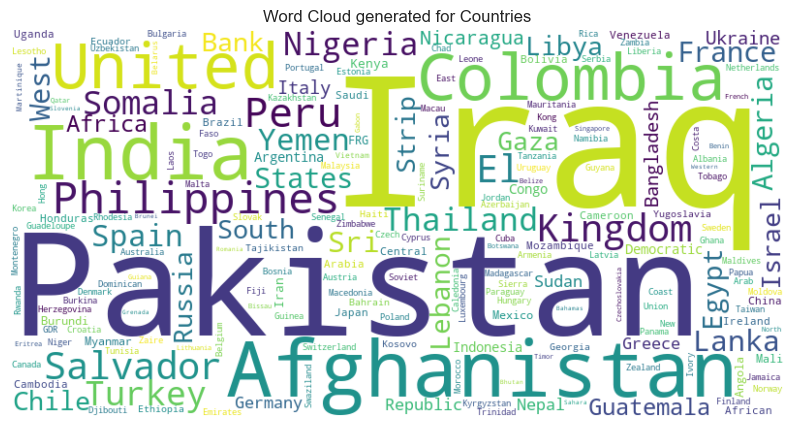

In [10]:
# here a wordcloud will be generated for the column Country
import wordcloud
text = ' '.join(data.Country.dropna(how = 'all'))


wordcloud = WordCloud(width=800, height=400, background_color='white',collocations = False).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud generated for Countries')
plt.show()

**From the above wordcloud generated it is clear that the countries like Pakistan, Iraq, Afghanisthan, India are some countries prominent in this dataset**

In [11]:
# Identifying and printing the most frequently occurring values for various columns in the dataset.
print("Country with the most attacks:",data['Country'].value_counts().idxmax())
print("City with the most attacks:",data['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",data['Region'].value_counts().idxmax())
print("Year with the most attacks:",data['Year'].value_counts().idxmax())
print("Month with the most attacks:",data['Month'].value_counts().idxmax())
print("Group with the most attacks:",data['Group'].value_counts().index[1])
print("Most Attack Types:",data['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


**Performing some univariate and bivariate analysis on the dataset**

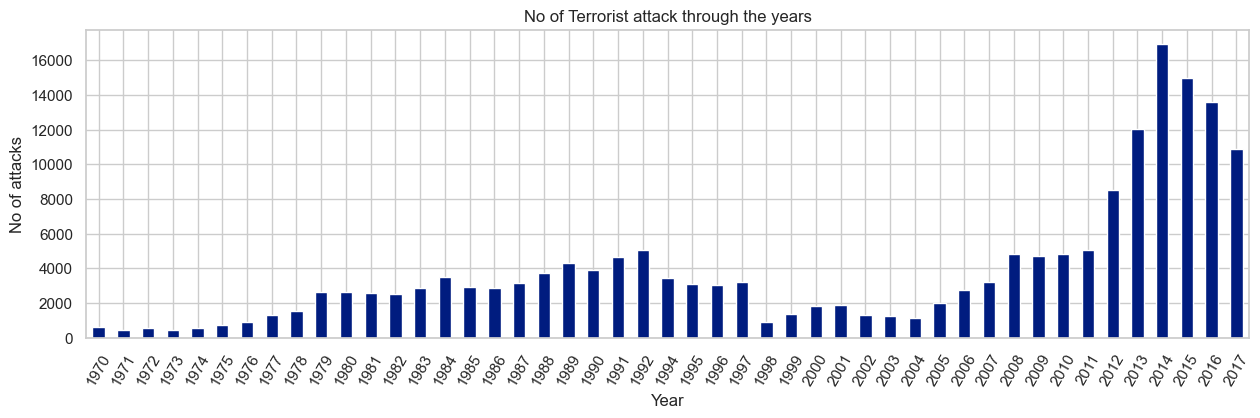

In [12]:
# Plotting the year against no of attacks
no_of_attacks_in_each_year = data['Year'].value_counts(dropna=False).sort_index()
plt.figure(figsize=(15, 4))
no_of_attacks_in_each_year.plot(kind='bar', color=serious_palette[0])
plt.title("No of Terrorist attack through the years")
plt.xlabel('Year')
plt.ylabel('No of attacks')
plt.xticks(rotation=60)
plt.show()

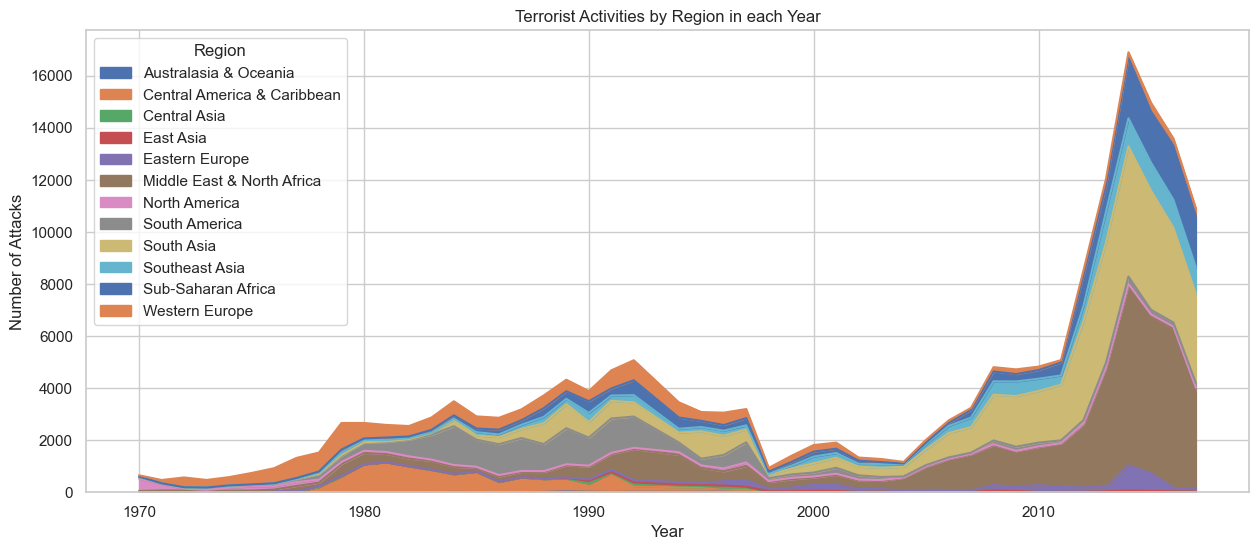

In [13]:
# Terrorist activities by region in each year
pd.crosstab(data.Year, data.Region).plot(kind='area', figsize=(15, 6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

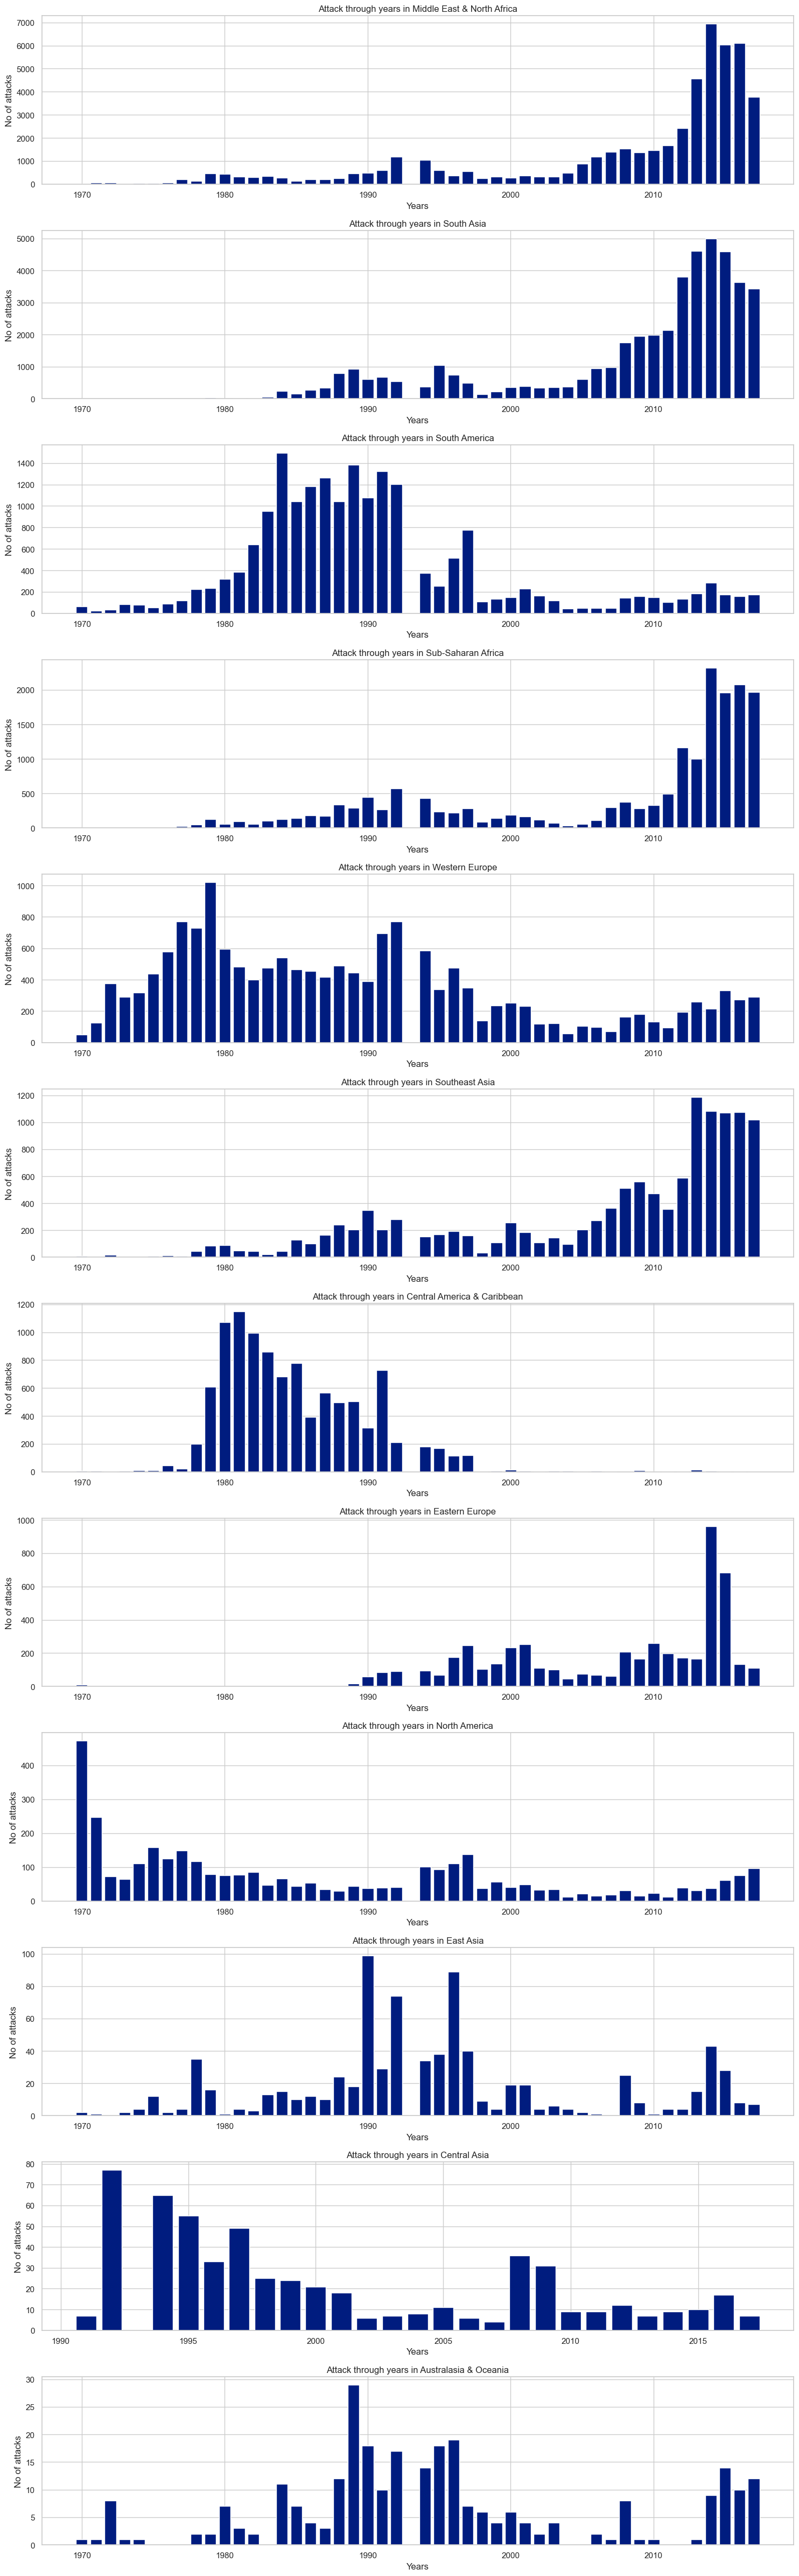

In [14]:
# Plotting the no of attacks to each region
Region = data['Region'].value_counts().index
fig, axes = plt.subplots(nrows=len(Region), figsize=(15, 4*len(Region)))

for i, region in enumerate(Region):
    no_of_attack_in_each_region = data[data['Region'] == region]['Year'].value_counts().sort_index()
    axes[i].bar(no_of_attack_in_each_region.index, no_of_attack_in_each_region.values,color=serious_palette[0])
    axes[i].set_xlabel('Years')
    axes[i].set_ylabel('No of attacks')
    axes[i].set_title(f"Attack through years in {region}")

plt.tight_layout()
plt.show()

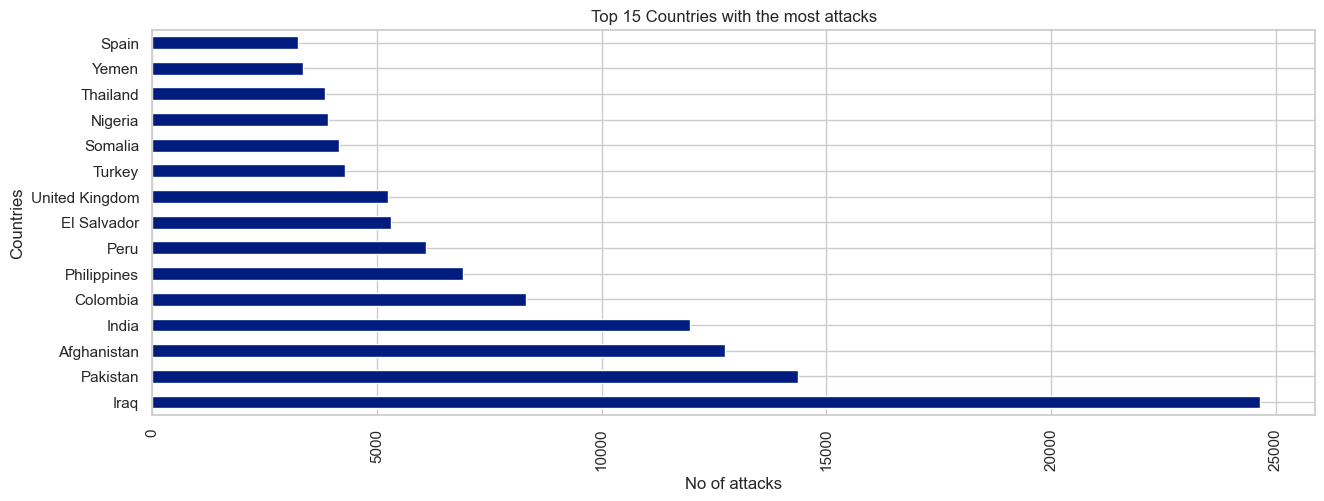

In [15]:
# plotting top 15 countries with the no of attacks
no_of_attacks_in_each_country = data['Country'].value_counts(dropna=False)
n = 15
top_n = no_of_attacks_in_each_country.head(n)
top_n_countries = top_n.index

plt.figure(figsize=(15, 5))
top_n.plot(kind='barh', color=serious_palette[0])
plt.title(f'Top {n} Countries with the most attacks')
plt.ylabel('Countries')
plt.xlabel('No of attacks')
plt.xticks(rotation=90)
plt.show()

In [16]:
top_n_countries

Index(['Iraq', 'Pakistan', 'Afghanistan', 'India', 'Colombia', 'Philippines',
       'Peru', 'El Salvador', 'United Kingdom', 'Turkey', 'Somalia', 'Nigeria',
       'Thailand', 'Yemen', 'Spain'],
      dtype='object', name='Country')

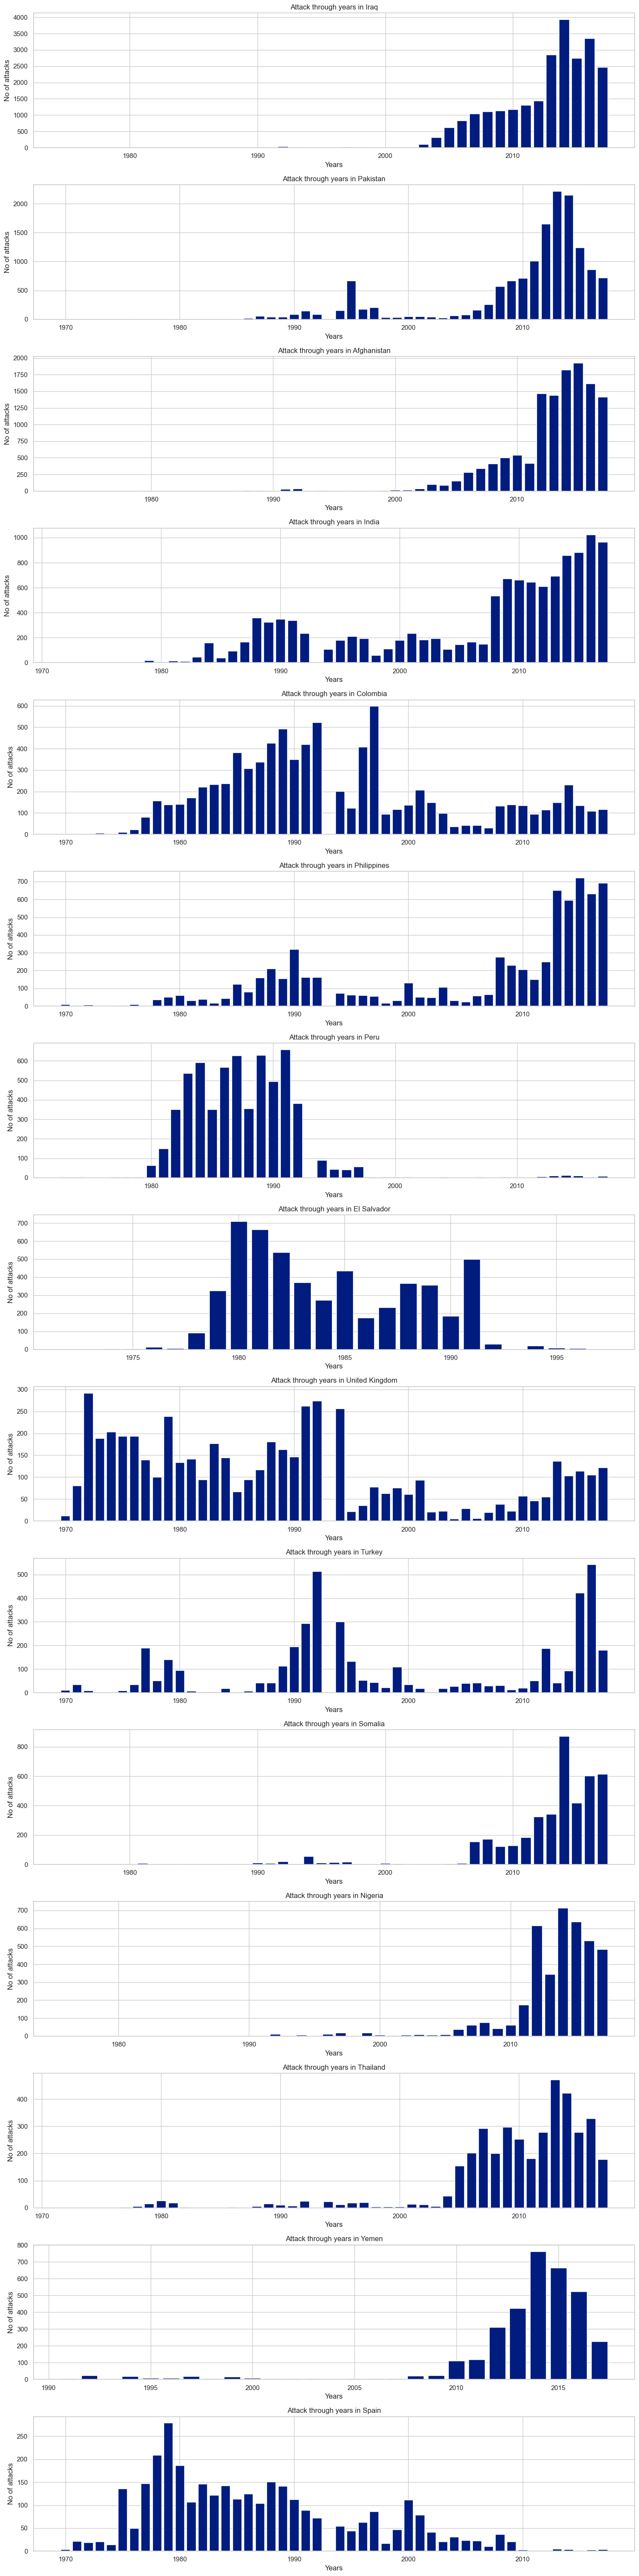

In [17]:
# Plotting each countries no of attacks throughout the years

fig, axes = plt.subplots(nrows=len(top_n_countries), figsize=(15, 4*len(top_n_countries)))

for i, country in enumerate(top_n_countries):
    no_of_attack_in_each_country = data[data['Country'] == country]['Year'].value_counts().sort_index()
    axes[i].bar(no_of_attack_in_each_country.index, no_of_attack_in_each_country.values,color=serious_palette[0])
    axes[i].set_xlabel('Years')
    axes[i].set_ylabel('No of attacks')
    axes[i].set_title(f"Attack through years in {country}")

plt.tight_layout()
plt.show()

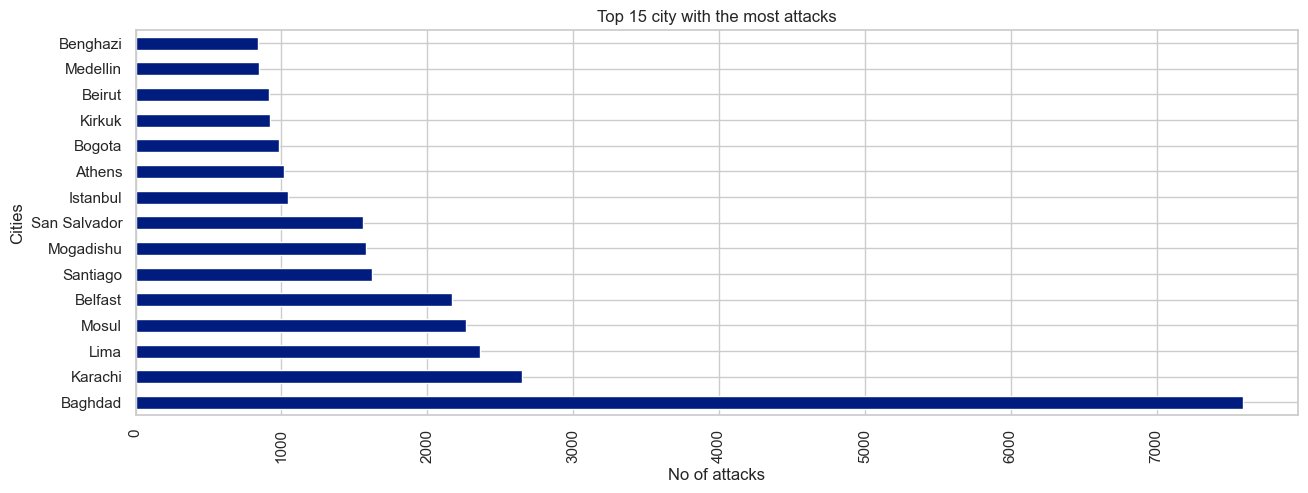

In [19]:
# Plotting no of attacks against top 15 cities 
no_of_attacks_in_each_city = data[data['city'] != 'Unknown']['city'].value_counts()
n = 15
top_n = no_of_attacks_in_each_city.head(n)
top_n_city = top_n.index

plt.figure(figsize=(15, 5))
top_n.plot(kind='barh',color=serious_palette[0])
plt.title(f'Top {n} city with the most attacks')
plt.ylabel('Cities')
plt.xlabel('No of attacks')
plt.xticks(rotation=90)
plt.show()


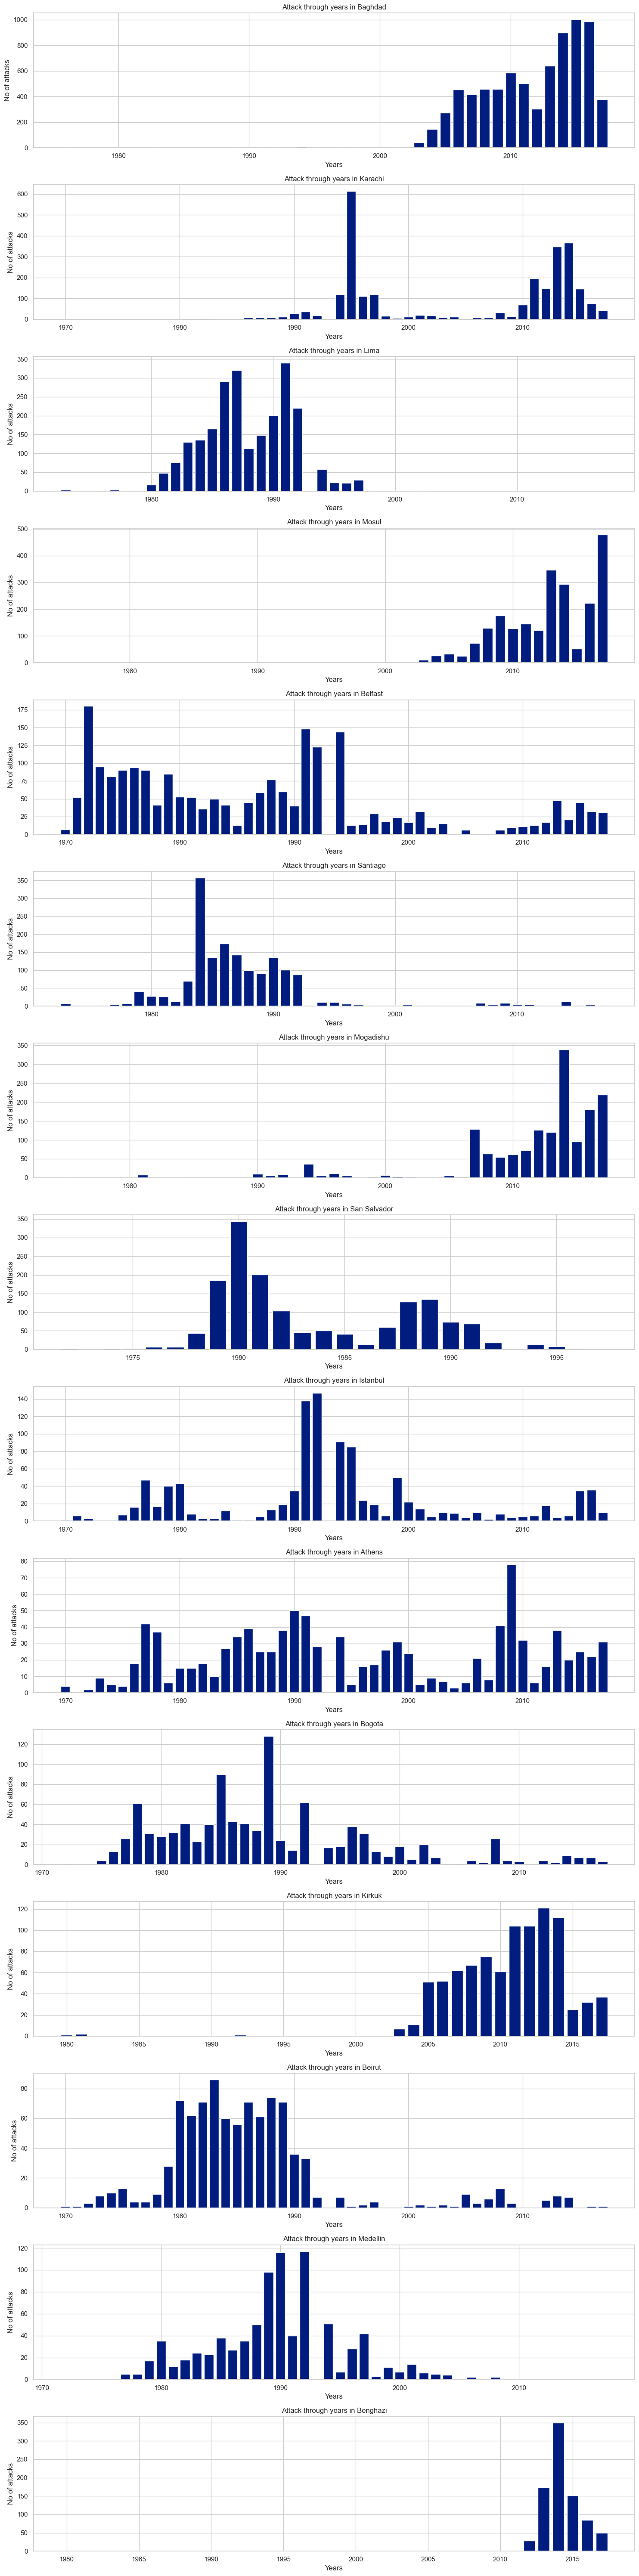

In [20]:
# Plotting each cities no of attacks throughout the years
fig, axes = plt.subplots(nrows=len(top_n_city), figsize=(15, 4*len(top_n_city)))

for i, city in enumerate(top_n_city):
    no_of_attack_in_each_city = data[data['city'] == city]['Year'].value_counts().sort_index()
    axes[i].bar(no_of_attack_in_each_city.index, no_of_attack_in_each_city.values, color=serious_palette[0])
    axes[i].set_xlabel('Years')
    axes[i].set_ylabel('No of attacks')
    axes[i].set_title(f"Attack through years in {city}")

plt.tight_layout()
plt.show()

In [21]:
type_of_attack = data['AttackType'].value_counts(dropna = False)

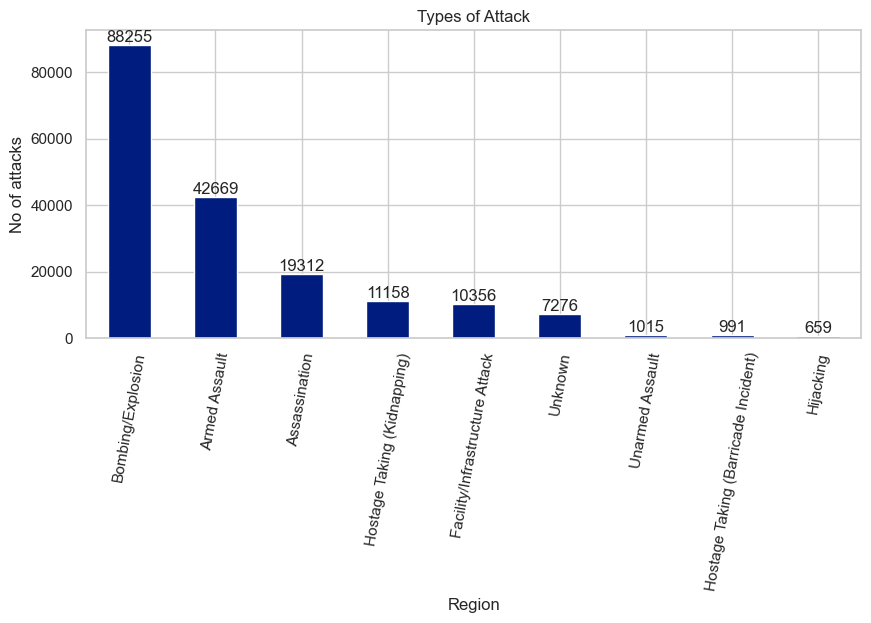

In [22]:
#Plotting the type of attack against the no of attacks
plt.figure(figsize=(10, 4))
bars = type_of_attack.plot(kind='bar',color=serious_palette[0])

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width()/2.0, bar.get_height(), int(bar.get_height()), ha='center', va='bottom')

plt.title("Types of Attack")
plt.xlabel('Region')
plt.ylabel('No of attacks')
plt.xticks(rotation=80)
plt.show()


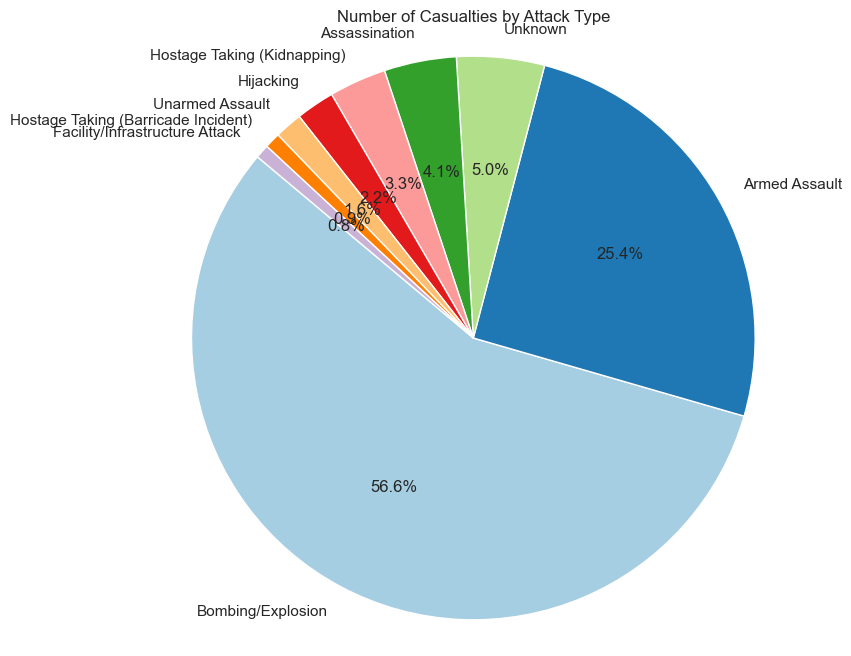

In [23]:
# Plotting the no of casualties agains the attack type

no_of_casualties_Attack_Type = data[['AttackType', 'Casualties']].groupby('AttackType').sum().sort_values(by='Casualties', ascending=False)
values = no_of_casualties_Attack_Type['Casualties'].values
labels = no_of_casualties_Attack_Type.index

plt.figure(figsize=(8, 8))  # Adjusting the figure size for better visualization
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Number of Casualties by Attack Type")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

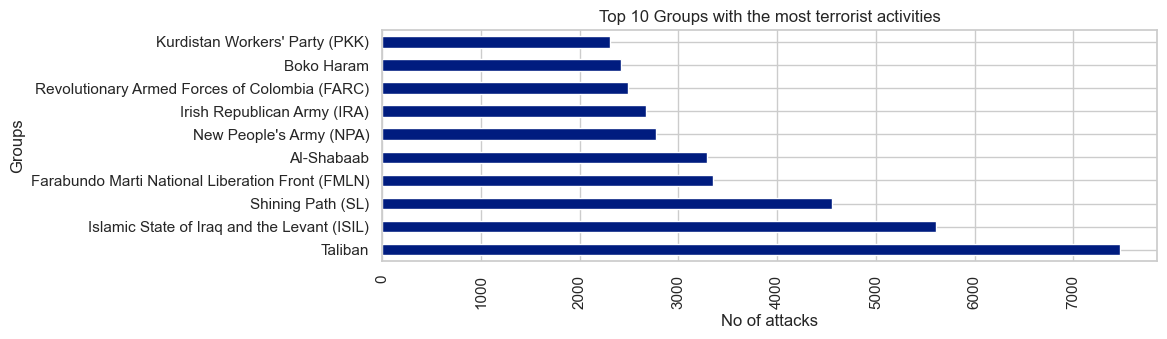

In [24]:
# Top 10 Prominent groups agains the no of attacks they were responsible
Groups = data[data['Group']!='Unknown']['Group'].value_counts(dropna = False)
n = 10
top_n = Groups.head(n)

top_n_groups= top_n.index


plt.figure(figsize=(10, 3))
top_n.plot(kind='barh', color=serious_palette[0])
plt.title(f'Top {n} Groups with the most terrorist activities')
plt.ylabel('Groups')
plt.xlabel('No of attacks')

plt.xticks(rotation=90)
plt.show()


<Figure size 1000x300 with 0 Axes>

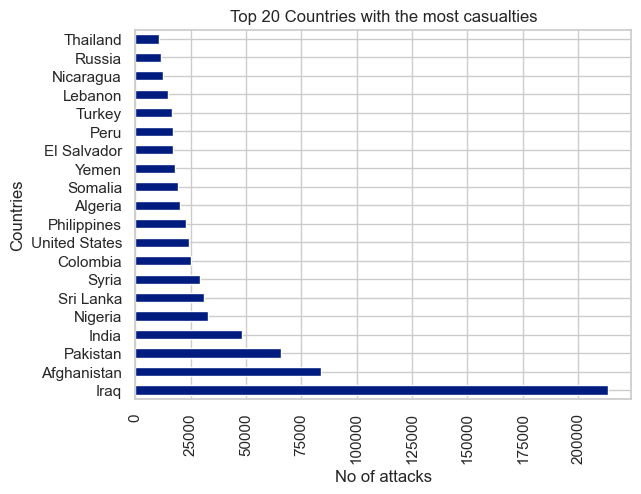

In [25]:
# Plotting Countries with the most casualties
Countries_casualties = data[['Country','Casualties']].groupby('Country').sum().sort_values(by='Casualties',ascending = False)

n = 20
top_n = Countries_casualties.head(n)


plt.figure(figsize=(10, 3))
top_n.plot(kind='barh',color=serious_palette[0],legend = False)
plt.title(f'Top {n} Countries with the most casualties')
plt.ylabel('Countries')
plt.xlabel('No of attacks')

plt.xticks(rotation=90)
plt.show()

<Figure size 1000x300 with 0 Axes>

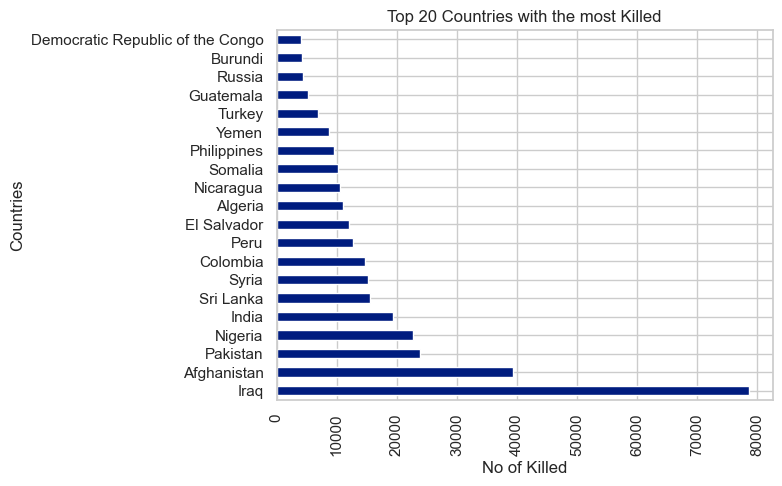

In [26]:
# Plotting Countries with the most kills
Countries_killed = data[['Country','Killed']].groupby('Country').sum().sort_values(by='Killed',ascending = False)

n = 20
top_n = Countries_killed.head(n)


plt.figure(figsize=(10, 3))
top_n.plot(kind='barh',color=serious_palette[0],legend = False)
plt.title(f'Top {n} Countries with the most Killed')
plt.ylabel('Countries')
plt.xlabel('No of Killed')

plt.xticks(rotation=90)
plt.show()

<Figure size 1000x300 with 0 Axes>

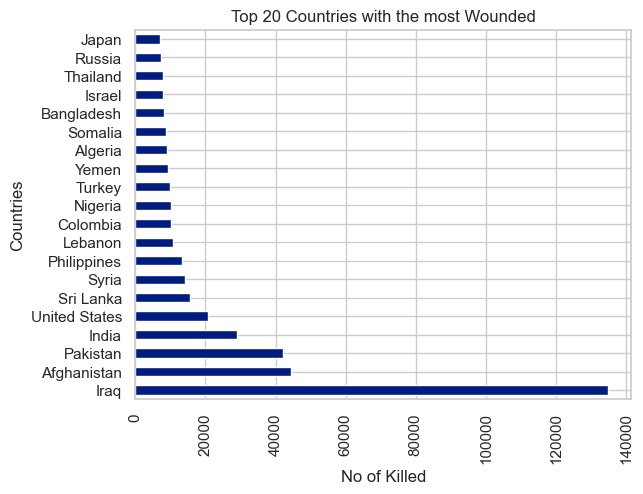

In [27]:
# Plotting the Country with the most Wounded
Countries_wounded = data[['Country','Wounded']].groupby('Country').sum().sort_values(by='Wounded',ascending = False)

n = 20
top_n = Countries_wounded.head(n)


plt.figure(figsize=(10, 3))
top_n.plot(kind='barh', color=serious_palette[0],legend = False)
plt.title(f'Top {n} Countries with the most Wounded')
plt.ylabel('Countries')
plt.xlabel('No of Killed')

plt.xticks(rotation=90)
plt.show()

<Figure size 1000x300 with 0 Axes>

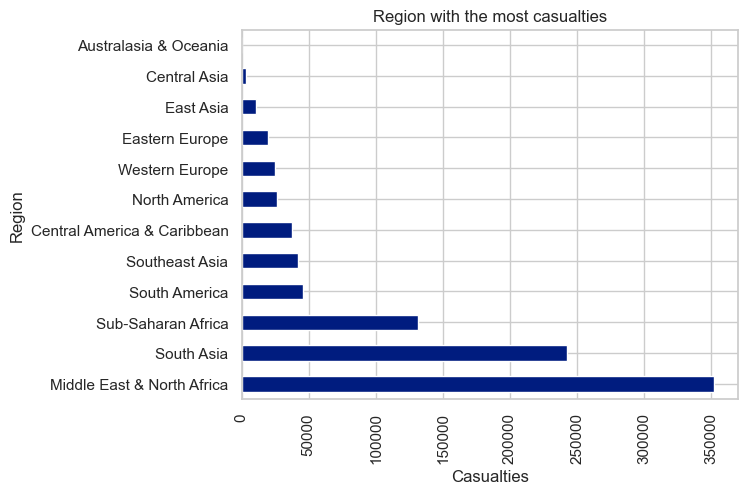

In [28]:
# Plotting the casualties against the regions
Region_casualties = data[['Region','Casualties']].groupby('Region').sum().sort_values(by='Casualties',ascending = False)

plt.figure(figsize=(10, 3))
Region_casualties.plot(kind='barh', color=serious_palette[0],legend = False)
plt.title(f'Region with the most casualties')
plt.ylabel('Region')
plt.xlabel('Casualties')

plt.xticks(rotation=90)
plt.show()

<Figure size 1000x300 with 0 Axes>

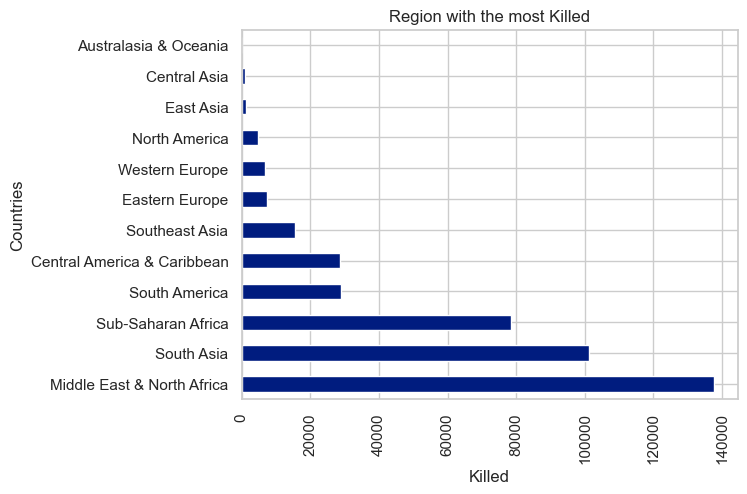

In [29]:
# Plotting the region against the no of killed
Region_killed = data[['Region','Killed']].groupby('Region').sum().sort_values(by='Killed',ascending = False)


plt.figure(figsize=(10, 3))
Region_killed.plot(kind='barh', color=serious_palette[0],legend = False)
plt.title(f'Region with the most Killed')
plt.ylabel('Countries')
plt.xlabel('Killed')

plt.xticks(rotation=90)
plt.show()

<Figure size 1000x300 with 0 Axes>

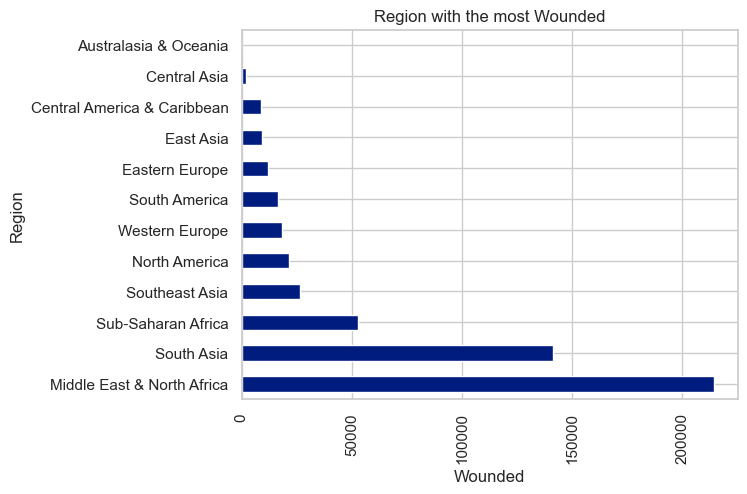

In [30]:
# Plotting the region casualties agains the no of Wounded
Region_Wounded = data[['Region','Wounded']].groupby('Region').sum().sort_values(by='Wounded',ascending = False)


plt.figure(figsize=(10, 3))
Region_Wounded.plot(kind='barh',color=serious_palette[0],legend = False)
plt.title(f'Region with the most Wounded')
plt.ylabel('Region')
plt.xlabel('Wounded')

plt.xticks(rotation=90)
plt.show()

In [31]:
killData = data.loc[:,'Killed']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))# drop the NaN values
attackData = data.loc[:,'AttackType']
# attackData
typeKillData = pd.concat([attackData, killData], axis=1)
typeKillFormatData = typeKillData.pivot_table(columns='AttackType', values='Killed', aggfunc='sum')
typeKillFormatData

Number of people killed by terror attack: 411868


AttackType  Armed Assault  Assassination  Bombing/Explosion  \
Killed           160297.0        24920.0           157321.0   

AttackType  Facility/Infrastructure Attack  Hijacking  \
Killed                              3642.0     3718.0   

AttackType  Hostage Taking (Barricade Incident)  Hostage Taking (Kidnapping)  \
Killed                                   4478.0                      24231.0   

AttackType  Unarmed Assault  Unknown  
Killed                880.0  32381.0

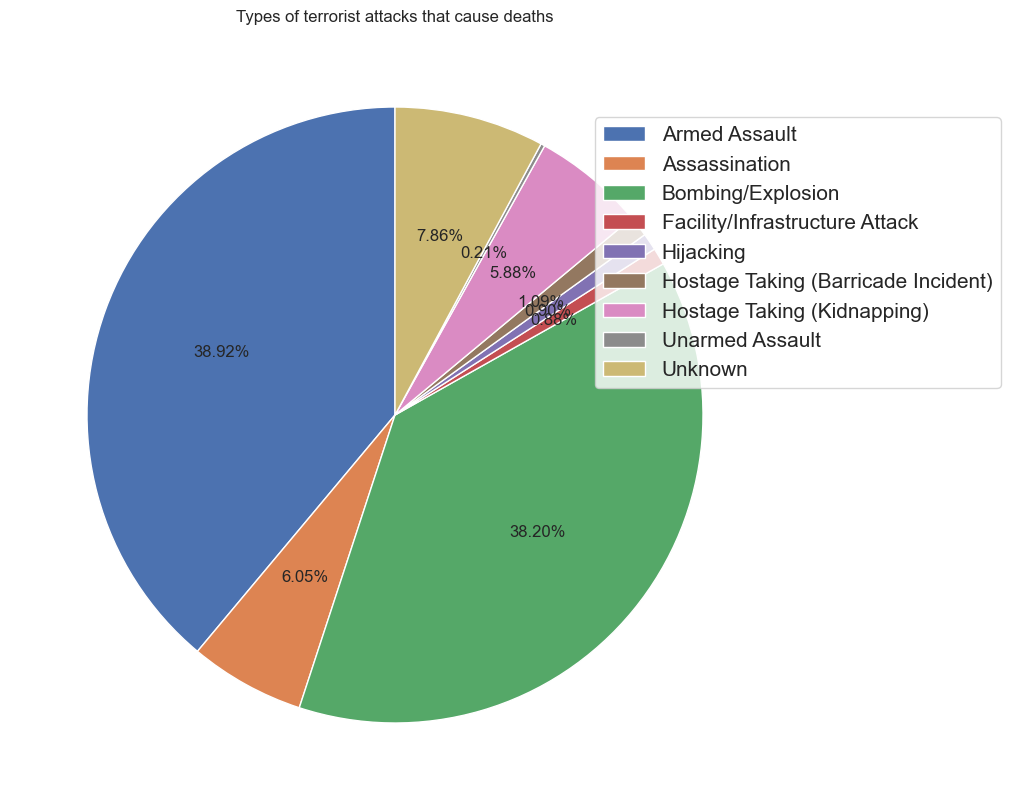

In [32]:
# Plotting the terrorist attack type that caused deaths
labels = typeKillFormatData.columns.tolist() # convert line to list
transpoze = typeKillFormatData.T # transpoze
values = transpoze.values.flatten()
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
plt.pie(values, startangle=90, autopct='%.2f%%')
plt.title('Types of terrorist attacks that cause deaths')
plt.legend(labels, loc='upper right', bbox_to_anchor = (1.3, 0.9), fontsize=15) # location legend
plt.show()

**Armed assault and bombing/explosion are seen to be the cause of 77% of the deaths in these attacks. This rate is why these attacks are used so many times in terrorist actions. This is how dangerous weapons and explosives are to the world.**

In [33]:
import folium
from folium.plugins import MarkerCluster 
filterYear = data['Year'] == 2007

In [34]:
filterData = data[filterYear] 

reqFilterData = filterData.loc[:,'city':'longitude'] 
reqFilterData = reqFilterData.dropna()
reqFilterDataList = reqFilterData.values.tolist()

In [35]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]],
                  popup = reqFilterDataList[point][0]).add_to(markerCluster)
map


**Above is the distribution of year 2007 on the attacks happened that year and the distribution shown globally**

**The data indicates that terrorist acts in the Middle East and North Africa tend to have fatal consequences. These regions are identified as hotspots for serious terrorist attacks. Contrary to the perception that Muslims support terrorism, the data shows that Muslims are the most affected by these attacks. The graphics reveal that Iraq, Afghanistan, and Pakistan—predominantly Muslim countries—suffer the most from terrorist activities. Furthermore, the EDA highlights an abnormal rise in the number of terrorist attacks after 2012, peaking in 2014, followed by a subsequent decline in the following years.**